<a href="https://colab.research.google.com/github/UthamanA/Face-Emotion-Recognition/blob/main/Face_Emotion_Recognition_Uthaman_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Facial Emotion Recognition**






Dataset - https://www.kaggle.com/c/challenges-in-representation-learning-facial-expression-recognition-challenge/data


In [1]:
_author_ = " Uthaman A "

**kaggle --account--Api**
API's are used to access data from kaggle
1. kaggle a/c -> my profile -> create api token
2. In colabs ..while uploading api file... go to /content
3. make .kaggle directory in /root 
4. copy kaggle api from /content to /root/.kaggle
5. kaggle cmd(find in kaggle dataset page-> data) to download
6. unzip the downloaded dataset


In [2]:
pwd

'/content'

In [3]:
cd /root

/root


In [4]:
mkdir .kaggle               # .kaggle not /.kaggle

In [5]:
cd /root/.kaggle

/root/.kaggle


In [6]:
!cp /content/kaggle.json ~/.kaggle 


In [7]:
pwd

'/root/.kaggle'

In [8]:
ls

kaggle.json


In [9]:
ls

kaggle.json


In [10]:
# if ..looks like outdated api ..server version ERROR occurs
!pip install --upgrade --force-reinstall --no-deps kaggle

     |████████████████████████████████| 58 kB 3.1 MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73051 sha256=6c83eca7516e4f35c3ef4acbb095015f210238f15a144c7cc88d9f2540b46a6f
  Stored in directory: /root/.cache/pip/wheels/62/d6/58/5853130f941e75b2177d281eb7e44b4a98ed46dd155f556dc5
Successfully built kaggle
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12


In [11]:
#if ..only read permisions ..ERROR
!chmod 600 /root/.kaggle/kaggle.json

In [12]:
# if 403 forbidden ERROR ... then accept the rules in kaggle dataset page

!kaggle competitions download -c challenges-in-representation-learning-facial-expression-recognition-challenge

 94% 267M/285M [00:01<00:00, 215MB/s]
100% 285M/285M [00:01<00:00, 210MB/s]


In [13]:
ls

challenges-in-representation-learning-facial-expression-recognition-challenge.zip
kaggle.json


In [14]:
!unzip challenges-in-representation-learning-facial-expression-recognition-challenge.zip

Archive:  challenges-in-representation-learning-facial-expression-recognition-challenge.zip
  inflating: example_submission.csv  
  inflating: fer2013.tar.gz          
  inflating: icml_face_data.csv      
  inflating: test.csv                
  inflating: train.csv               


In [15]:
ls

challenges-in-representation-learning-facial-expression-recognition-challenge.zip
example_submission.csv
fer2013.tar.gz
icml_face_data.csv
kaggle.json
test.csv
train.csv


In [16]:
!tar -xf fer2013.tar.gz   # x= extract , f= to create archive

In [17]:
ls

challenges-in-representation-learning-facial-expression-recognition-challenge.zip
example_submission.csv
fer2013/
fer2013.tar.gz
icml_face_data.csv
kaggle.json
test.csv
train.csv


In [18]:
cd fer2013

/root/.kaggle/fer2013


In [19]:
ls

fer2013.bib  fer2013.csv  README


## **Dataset**
* The data consists of 48x48 pixel grayscale images of faces. 
 
* The task is to categorize each face based on the emotion shown in the facial expression in to one of seven categories (0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral).
* Dataset contains two columns, "emotion" and "pixels".
* The "emotion" column contains a numeric code ranging from 0 to 6, inclusive, for the emotion that is present in the image. 
* The "pixels" column contains a string surrounded in quotes for each image. The contents of this string a space-separated pixel values in row major order. test.csv contains only the "pixels" column and your task is to predict the emotion column.

# Data Visualization

* powerful visualization tools => matplotlib, seaborn
      1. matplotlib works on pandas dataframe
      2.  matplotlib => basic ploting =>bars,pie,scatter, lines etc.. => used for MATLAB like graphs
      3. seaborn => statistical ploting => depends on matplotlib...high level => provides default templates

In [20]:
""" IMPORT ALL DEPENDENCIES"""


# NumPy for numerical computing
import numpy as np

# Pandas for DataFrames
import pandas as pd

# Matplotlib for visualization
from matplotlib import pyplot as plt
# display plots in the notebook
%matplotlib inline
# import color maps
from matplotlib.colors import ListedColormap

# Seaborn for easier visualization
import seaborn as sns

In [21]:
df = pd.read_csv("/root/.kaggle/fer2013/fer2013.csv")
df.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [22]:
df

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training
...,...,...,...
35882,6,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...,PrivateTest
35883,3,178 174 172 173 181 188 191 194 196 199 200 20...,PrivateTest
35884,0,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...,PrivateTest
35885,3,30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...,PrivateTest


In [23]:
df.shape

(35887, 3)

## **Plotting emotion**

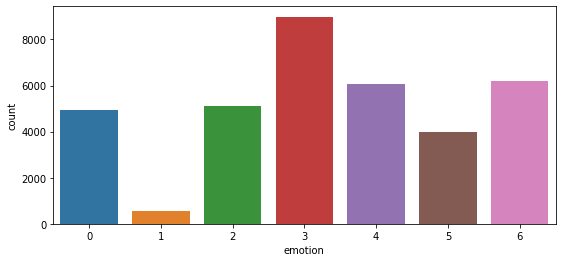

In [24]:
""" matplotlib => to define size , sns => to use counterplot """

plt.figure(figsize=(9,4))
sns.countplot(x='emotion', data=df)

In [25]:
df['emotion'].value_counts()

3    8989
6    6198
4    6077
2    5121
0    4953
5    4002
1     547
Name: emotion, dtype: int64

* where ** 0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral**

### Observation
* for Digust we have about 547 images only very less. 

## **Plotting Usage**

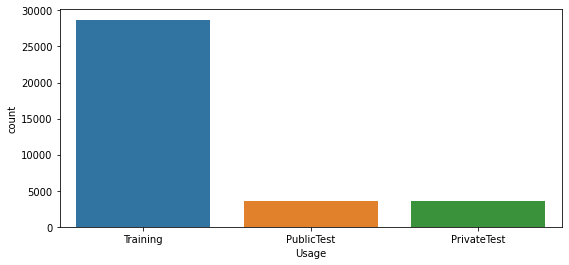

In [26]:
plt.figure(figsize=(9,4))
sns.countplot(x='Usage', data=df)

In [27]:
df['Usage'].value_counts()

Training       28709
PublicTest      3589
PrivateTest     3589
Name: Usage, dtype: int64

 **Intuition**

* % matplotlib inline ==> magic cmd to setup IPython to display and store figures in notebooks
* dataframe ==>pd.read_csv() , .head(), .tail(), .shape
* count ==>  sns.countplot(x=,df) -> for graphs  ; df[col].value_counts() -> to display count values


# PreProcessing

In [28]:
import cv2
image_size=(48,48)

In [29]:
pixels = df['pixels'].tolist() # Converting the relevant column element into a list for each row
width, height = 48, 48
faces = []

for pixel_sequence in pixels:
  face = [int(pixel) for pixel in pixel_sequence.split(' ')] # Splitting the string by space character as a list
  face = np.asarray(face).reshape(width, height) #converting the list to numpy array in size of 48*48
  face = cv2.resize(face.astype('uint8'),image_size) #resize the image to have 48 cols (width) and 48 rows (height)
  faces.append(face.astype('float32')) #makes the list of each images of 48*48 and their pixels in numpyarray form
  
faces = np.asarray(faces) #converting the list into numpy array
faces = np.expand_dims(faces, -1) #Expand the shape of an array -1=last dimension => means color space
emotions = pd.get_dummies(df['emotion']).to_numpy() #doing the one hot encoding type on emotions

In [30]:
print(faces[0]) #Pixels after preprocessing

[[[ 70.]
  [ 80.]
  [ 82.]
  ...
  [ 52.]
  [ 43.]
  [ 41.]]

 [[ 65.]
  [ 61.]
  [ 58.]
  ...
  [ 56.]
  [ 52.]
  [ 44.]]

 [[ 50.]
  [ 43.]
  [ 54.]
  ...
  [ 49.]
  [ 56.]
  [ 47.]]

 ...

 [[ 91.]
  [ 65.]
  [ 42.]
  ...
  [ 72.]
  [ 56.]
  [ 43.]]

 [[ 77.]
  [ 82.]
  [ 79.]
  ...
  [105.]
  [ 70.]
  [ 46.]]

 [[ 77.]
  [ 72.]
  [ 84.]
  ...
  [106.]
  [109.]
  [ 82.]]]


In [31]:
print(faces.shape)
print(faces[0].ndim)
print(type(faces))

(35887, 48, 48, 1)
3
<class 'numpy.ndarray'>


In [32]:
print(emotions[0]) #Emotion after preprocessing

[1 0 0 0 0 0 0]


In [33]:
print(emotions.shape)
print(emotions.ndim)
print(type(emotions))

(35887, 7)
2
<class 'numpy.ndarray'>


**Intuition**
* Pandas series(or col of dataframe) to list => tolist() =>gives list of string of values->each string is a image
* split each string(image) in list and cvt them into list of list of integers
* convert list into numpy array =>np.asarray(list)
* numpy array has reshape(width,height) 
* cv2 has resize(nparray, (size)) -->cvt image into uint8(unsigned 8 bit integer) -> has range [0,255]
  1. uint16 => [0,65535]
  2. uint32 => 32 bit or 4 bytes => [0, 2^32]
  3. float => [-1,1] or [0,1]
  4. int8 => [-128, 127]
  5. int =>  [-2^31 , 2^31 -1] 
* images => ntg but numpy array
* openCV has 3 dimensions => width,height, color => color space = BGR ; dtype => by default uint8
* reshape returns a copy [ doesn't change values] whereas resize changes the values[not return a copy]
* np.expand_dims => inserts new axis => ntg but boxes(just think for convenience) => to increase dimensions => to expand shape
  1. axis= 0 -> box to all values ; axis =1 -> boxes to each individual values
  2. example , (2,1,2) =>[ [[[],[]]],[[[],[]]] ] => list has 2 boxes - each box has 1 box - inside that each 1 box has 2 boxes --> in general box is a list or value
* pd.get_dummies => convert pd series into dummy coded dataframes or indicator variables. => categorical var into indicators vars. => s.no(row names) * values(cols names) - 0,1 values.
* numpy.asmatrix(data,dtype) => interpret input as a matrix => doesn't return a copy of matrix if given input is a matrix.
  1. In list[0][1] =>In numpy[0,1] -> means In first box 2nd ele.
*pd.df.to_numpy() => converts pandas dataframe into numpy array -> ndarray - usally 2 dim ->
  1. dataframe -> some kind of tabular format with some indexes. ; numpy array -> some kind of lists of lists
  2.

# Splitting the dataset

## Scaling the pixels between -1 and 1

In [34]:
x = faces.astype('float32')
x = x / 255.0 #Dividing the pixels by 255 for normalization  => range(0,1)

# Scaling the pixels value in range(-1,1)
x = x - 0.5
x = x * 2.0

In [35]:
print(x[0])

[[[-0.45098037]
  [-0.372549  ]
  [-0.35686272]
  ...
  [-0.5921569 ]
  [-0.6627451 ]
  [-0.6784314 ]]

 [[-0.49019605]
  [-0.52156866]
  [-0.54509807]
  ...
  [-0.56078434]
  [-0.5921569 ]
  [-0.654902  ]]

 [[-0.60784316]
  [-0.6627451 ]
  [-0.5764706 ]
  ...
  [-0.6156863 ]
  [-0.56078434]
  [-0.6313726 ]]

 ...

 [[-0.2862745 ]
  [-0.49019605]
  [-0.67058825]
  ...
  [-0.4352941 ]
  [-0.56078434]
  [-0.6627451 ]]

 [[-0.3960784 ]
  [-0.35686272]
  [-0.38039213]
  ...
  [-0.17647058]
  [-0.45098037]
  [-0.6392157 ]]

 [[-0.3960784 ]
  [-0.4352941 ]
  [-0.34117645]
  ...
  [-0.16862744]
  [-0.14509803]
  [-0.35686272]]]


In [36]:
type(x)

numpy.ndarray

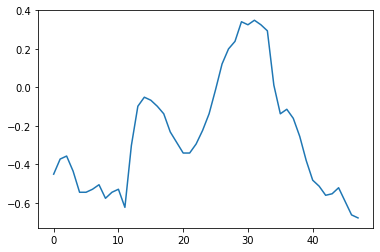

In [37]:
plt.plot(x[0,0])
plt.show()

In [38]:
print(x.min(),x.max()) # we can observe that pixels are scale

-1.0 1.0


## Splitting the dataset into train & validation set

In [39]:
num_samples, num_classes = emotions.shape

num_samples = len(x)
num_train_samples = int((1 - 0.2)*num_samples)

# Traning data
train_x = x[:num_train_samples]
train_y = emotions[:num_train_samples]

# Validation data
val_x = x[num_train_samples:]
val_y = emotions[num_train_samples:]

train_data = (train_x, train_y)
val_data = (val_x, val_y)

In [40]:
print('Training Pixels',train_x.shape)  # ==> 4 dims -  no of images , width , height , color
print('Training labels',train_y.shape)

print('Validation Pixels',val_x.shape)
print('Validation labels',val_y.shape)

Training Pixels (28709, 48, 48, 1)
Training labels (28709, 7)
Validation Pixels (7178, 48, 48, 1)
Validation labels (7178, 7)


* shape => returns no of samples , classes ; len => no of samples
* training -> x = x[: 0.8*no_of_samples] , y = y[: 0.8*no_of_samples]     ---> take the benefit of slicing
* validation -> x = x[ 0.8*no_of_samples  : ] , y = y[ 0.8*no_of_samples  : ]
* data = (x,y)

* take benefit of type(), print() --> for checking

# Defining Model

In [41]:
#load the libaray to built the model
from keras.layers import Activation, Convolution2D, Dropout, Conv2D
from keras.layers import AveragePooling2D, BatchNormalization
from keras.layers import GlobalAveragePooling2D
from keras.models import Sequential
from keras.layers import Flatten
from keras.models import Model
from keras.layers import Input
from keras.layers import MaxPooling2D
from keras.layers import SeparableConv2D
from keras import layers
from keras.regularizers import l2

* keras is a deep learning library => powerful easy to use library => high level API for tensorflow, Theano => wrapper
* minimalistic , modular approach
* obviously,oversimplification ->abstract representations of neural networks
* import 
  1. Sequential => linear stack of NN layers -> feed forward cnn
  2. layers -> for almost any nn
  3. CNN layers -> convolution2D , maxpooling2D


In [42]:
"""
* keras.__version__
* pip install --upgrade keras
"""

'\n* keras.__version__\n* pip install --upgrade keras\n'

* Deep learning led to advances in computer vision
* Neural networks learn more complex features from input image.
  1. input layer => feeding input
  2. first hidden layer =>  only learn local edge patterns
  3. each subsequent layer => filters => learns more complex representations
  4. classify

* CNN => reduce no of parameters that need to be tuned => handle high dimensionality

# 1) Simpler CNN

In [43]:
input_shape=(48, 48, 1)
num_classes = 7

In [44]:
""" Building up Model Architecture """

model = Sequential()
model.add(Convolution2D(filters=16, kernel_size=(7, 7), padding='same',
                            name='image_array', input_shape=input_shape))
model.add(BatchNormalization())
model.add(Convolution2D(filters=16, kernel_size=(7, 7), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(AveragePooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(.5))

model.add(Convolution2D(filters=32, kernel_size=(5, 5), padding='same'))
model.add(BatchNormalization())
model.add(Convolution2D(filters=32, kernel_size=(5, 5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(AveragePooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(.5))

model.add(Convolution2D(filters=64, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Convolution2D(filters=64, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(AveragePooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(.5))

model.add(Convolution2D(filters=128, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Convolution2D(filters=128, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(AveragePooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(.5))

model.add(Convolution2D(filters=256, kernel_size=(3, 3), padding='same'))



model.add(BatchNormalization())
model.add(Convolution2D(filters=num_classes, kernel_size=(3, 3), padding='same'))
model.add(GlobalAveragePooling2D())
model.add(Activation('softmax',name='predictions'))



 # **Intuition**


---



* **Convolution** => matrix multiplication with filter -> feature detector
  * Convolution2d => for filtering windows of 2 dimensional input -> if 1st layer = input_shape
* filters = windows ; 2 dim filter => sliding window
* sliding window slides over each channel and summarising the features.
*  **batch normalisation** => used to stabilise perhaps accelerate learning process => standardise layer inputs => by applying transformation that maintains mean activation close to 0 and activation standard deviation(sq root of variance ---> how far) close to 1.
  1. normalisation => process tend to follow bell shape curve known as normal distribution
  2. backpropagation => updated layer by layer backward from output to the input using estimate of error that assumes weights in the layer prior to the current layer are fixed.
  3. gradient tells how to update each parameter under the assumption that other layers do not change. 
  4. all layers changes during an update --> this update procedure leads to forever chasing a moving target.
  5. batch normalisation => technique to coordinate the update  of multiple layers in the model => reparametrization of network
  6. its about standardize the mean and variance of each unit in normal dist
  7. its all about standardixeing inputs to layers for each mini batch

* **Activation(ReLu)**: activation layer( non linear layer) 
  1. convention is to apply after conv layer
  2. to introduce non linearity to a system that has computed linear operations in conv
  3. Rectified linear unit => widely used  than non linear functions(sigmoid, tanh) for its fast training with out accuracy. => max(0,x)
  4. Relu also alleviates vanishing gradient (lower layers of network trains very slowly because the gradient decreases slowly throught layers.
  5. without these non linear functions(activation functions) , the network would be a large linear classifier that could simplified by multiplying weight matrices(accounting for bais) . It wouldn't do anything interesting such as image classification etc..
* **Pooling** => max, avg ,globalmax, globalavg
  1. conv > activation > pooling
  2.to reduce dimensions of feature map => reduces parameters to learn and amt of computations
  3. it further summarizes the feature map  instead of precisely positioned features generated by conv layer. This makes model more robust to variations in the position of features in image
  4.when network wants to detect higher level features from low level building blocks (detecting corners from edges) . we dont need a rigid about exact position => we need translational invariance at the feature level . so insert pooling
  5. overcomes the problem of sensitive to the location of the features.
  6. local translation invariance

*  **Dropout** => regularization technique
  1.neurons are randomly dropped while training
  2. this effect makes network less sensitive to thespecific weights of neurons 
  3. better generalization - less overfit


---
**Functions:**
* convolution2d => no of filters or kernels , kernal size , padding => same(zero padding) , valid (no padding) for input ; stride = step or movement of kernel. ; if 1st layer -> input_shape
* BatchNormalisation => no args 
* Activation => func name
* AveragePooling2D => 2D means 2 dimensional feature map ; kernel size , padding
* Dropout => % of drop of neurons 
* AT output , convolution2d --> filters = no of classes ; activation --> softmax



In [45]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
image_array (Conv2D)         (None, 48, 48, 16)        800       
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 16)        64        
_________________________________________________________________
conv2d (Conv2D)              (None, 48, 48, 16)        12560     
_________________________________________________________________
batch_normalization_1 (Batch (None, 48, 48, 16)        64        
_________________________________________________________________
activation (Activation)      (None, 48, 48, 16)        0         
_________________________________________________________________
average_pooling2d (AveragePo (None, 24, 24, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 16)        0

In [46]:
# parameters
batch_size = 32 #Number of samples per gradient update
num_epochs = 200 # Number of epochs to train the model.
#input_shape = (64, 64, 1)
verbose = 1 #per epohs  progress bar
num_classes = 7 
patience = 50
base_path = 'drive/Colab Notebooks/emotion/simplecnn/'

In [47]:
from keras.callbacks import CSVLogger, ModelCheckpoint, EarlyStopping
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator

## Data Augmenttion

In [48]:
""" Data Augmentation => taking the batch and apply some series of random transformations (random rotation, resizing, shearing) 

      ===> to increase generalizability of model  """


# data generator Generate batches of tensor image data with real-time data augmentation
data_generator = ImageDataGenerator(
                        featurewise_center=False,
                        featurewise_std_normalization=False,
                        rotation_range=10,
                        width_shift_range=0.1,
                        height_shift_range=0.1,
                        zoom_range=.1,
                        horizontal_flip=True)

**ImageDataGenerator**
* horizontal and vertical shift => moving all pixels of image in one direction 
  1. width_shift_range ( horizonatal shift)
  2. height_shift_range (vertical shift)
  3. floating num [0- 1] --> % of shift

* horizontal n vertical flips augmentation ==>reversing rows or cols of pixels  --> True or False
* Random rotation  --> 0 - 360 degrees --> rotation_range = 90 ==> means random rotation to image blw 0 and 90 degrees
* random  brightness --> randomly darkens or brightens images ==> brightness_range =[0.2,1.0] --> means darkens or brightens if pixel is blw 0.2 and 1
* random zoom
  1. either adds pixel or subtract pixels in image . [1-value, 1+value] 
  2. for example , zoom_range = .3 --> range [0.7, 1.3] or blw 70%(zoom in) and 130% (zoomout)

---
when an object is created using following args. an iterator can be created for an image dataset. 
* it iterates through all images in memory --> obj.flow(X,y)
* to iterates images through subdirectories --> obj. flow_from_directory(X,y,..)
* to train ==> fit_generator() 

In [49]:
# model parameters/compilation

""" CONFIGURATION ==>.compile(optimizer, loss , metrics) """



model.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
image_array (Conv2D)         (None, 48, 48, 16)        800       
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 16)        64        
_________________________________________________________________
conv2d (Conv2D)              (None, 48, 48, 16)        12560     
_________________________________________________________________
batch_normalization_1 (Batch (None, 48, 48, 16)        64        
_________________________________________________________________
activation (Activation)      (None, 48, 48, 16)        0         
_________________________________________________________________
average_pooling2d (AveragePo (None, 24, 24, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 16)        0

In [50]:
datasets = ['fer2013']
num_epochs = 30
base_path="/content"
for dataset_name in datasets:
    print('Training dataset:', dataset_name)

    #callbacks
    log_file_path = dataset_name + '_emotion_training.log'

    csv_logger = CSVLogger(log_file_path, append=False)
    early_stop = EarlyStopping('val_loss', patience=patience)
    reduce_lr = ReduceLROnPlateau('val_loss', factor=0.1,patience=int(patience/4), verbose=1)
    
    trained_models_path = base_path + dataset_name + 'simple_cnn'
    model_names = trained_models_path + '.{epoch:02d}-{val_loss:.2f}.hdf5'      # if error "acc" in 1 line ... don't confuse check entire block since fit() generates a inner loop
    model_checkpoint = ModelCheckpoint(model_names, 'val_loss', verbose=1,save_best_only=True)
    my_callbacks = [model_checkpoint, csv_logger, early_stop, reduce_lr]

    # loading dataset
    train_faces, train_emotions = train_data
    history=model.fit_generator(data_generator.flow(train_faces, train_emotions,
                                            batch_size),
                        epochs=num_epochs, verbose=1
                        ,callbacks=my_callbacks,validation_data =val_data)   #not callbacks = [my_callbacks] since we my_callbacks is already a list 

Training dataset: fer2013


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
898/898 [==============================] - 61s 33ms/step - loss: 1.7759 - accuracy: 0.2856 - val_loss: 1.6391 - val_accuracy: 0.3455

Epoch 00001: val_loss improved from inf to 1.63911, saving model to /contentfer2013simple_cnn.01-1.64.hdf5
Epoch 2/30
898/898 [==============================] - 29s 33ms/step - loss: 1.6489 - accuracy: 0.3508 - val_loss: 1.5666 - val_accuracy: 0.3961

Epoch 00002: val_loss improved from 1.63911 to 1.56655, saving model to /contentfer2013simple_cnn.02-1.57.hdf5
Epoch 3/30
898/898 [==============================] - 29s 32ms/step - loss: 1.5705 - accuracy: 0.3857 - val_loss: 1.4060 - val_accuracy: 0.4611

Epoch 00003: val_loss improved from 1.56655 to 1.40597, saving model to /contentfer2013simple_cnn.03-1.41.hdf5
Epoch 4/30
898/898 [==============================] - 29s 32ms/step - loss: 1.5205 - accuracy: 0.4084 - val_loss: 1.4021 - val_accuracy: 0.4588

Epoch 00004: val_loss improved from 1.40597 to 1.40211, saving model to /contentfer2013simp

**keras**
* **callbacks** => an object that can perform actions at various stages of training
      1. write tensorflowboard logs after every batch
      2. periodically save model to disk
      3. do early stopping 
      4. view on internal states and statistics during training
      * used in fit() loop
  * **CSVLogger(filename, separator=",')**  --> to save epoch results to a csv file
      * create obj and use that obj in fit(callbacks=[csv_logger_obj])
  * **EarlyStopping()** --> stop training when a monitored metric 
  has stopped improving
      1. monitor = "val_loss" --> loss function to be monitored
      2. min_delta --> minimum change to count(threshold)
      3. patience --> no of epochs with no improvement to stop training
  * **ReduceLROnPlateau()**--> reduce learning rate when metric has stopped improving
      1. monitor, patience, min_delta
      2. factor = 0.1 ==> learning rate reduced to 10% (lr*0.1)
      3. verbose ==> 0: quiet , 1: update msgs
  * **ModelCheckpoint()** -->to save  keras model or model weights at some frequency
      1. filepath
      2. monitor --> val_acc or val_loss
      3. save_best_only = True 

---
fit_generator(.flow(X,y, batchsize), verbose,epochs,validation_data)

* fit() ==> training loop
* logs ==> dict

In [51]:
#evaluate() returns [loss,acc]
score = model.evaluate(val_x, val_y, verbose=1) 
print('Test loss:', score[0])
print('Test accuracy:', score[1]*100)


225/225 [==============================] - 2s 9ms/step - loss: 1.1311 - accuracy: 0.5680
Test loss: 1.1310887336730957
Test accuracy: 56.798553466796875


**history** ====> default callbacks that is registered when training 

        1.  records training metrics for each epoch
        2. these metrics stored in dictionary in history member of object returned
        3. obj returns from calls to fit() used to train model 
        4. data collected in history obj  used to create plots

In [52]:
""" metrics collected by history object """
history_dict=history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])

In [53]:
print(history_dict["accuracy"])

[0.2856247127056122, 0.3507610857486725, 0.3856978714466095, 0.4083736836910248, 0.4253021776676178, 0.4429273009300232, 0.4513567090034485, 0.457940012216568, 0.4647323191165924, 0.46873801946640015, 0.4761573076248169, 0.480511337518692, 0.48956772685050964, 0.49068236351013184, 0.4917621612548828, 0.49594202637672424, 0.4956633746623993, 0.49911177158355713, 0.5001915693283081, 0.5043017864227295, 0.503430962562561, 0.5085164904594421, 0.5074018836021423, 0.5110244154930115, 0.5135671496391296, 0.5130098462104797, 0.5138109922409058, 0.5168066024780273, 0.5179212093353271, 0.520220160484314]


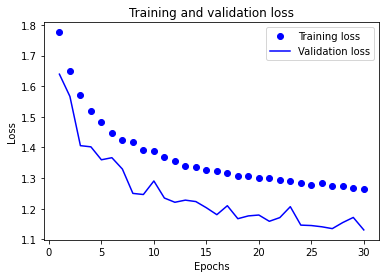

In [54]:
""" Visualising model training history """

import matplotlib.pyplot as plt

train_loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, train_loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

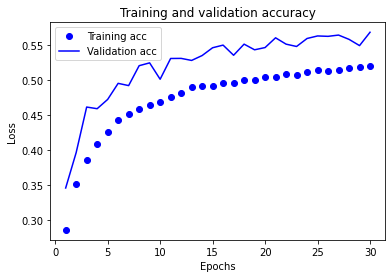

In [55]:
train_acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
plt.plot(epochs, train_acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Testing the model on  some images

In [56]:
 emotion_dict = {0: "Neutral", 1: "Disgusted", 2: "Fearful", 3: "Happy", 4: "Sad", 5: "Surprised", 6: "Neutral"}

  #emojis unicodes #
 emojis = { 0:"\U0001f620",1:"\U0001f922" ,2:"\U0001f628" ,3:"\U0001f60A" , 4:"\U0001f625" ,5:"\U0001f632",6:"\U0001f610" }

In [57]:
print(emojis.values(),sep=" ")

dict_values(['😠', '🤢', '😨', '😊', '😥', '😲', '😐'])


In [58]:
!cd content
!pwd
!ls

/bin/bash: line 0: cd: content: No such file or directory
/root/.kaggle/fer2013
fer2013.bib  fer2013.csv  fer2013_emotion_training.log	README
